In [263]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay

In [264]:
dataset = datasets.load_iris()
dataset.data = dataset.data[:, [0,2]]


In [265]:
dataset.target
# len(dataset.target)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

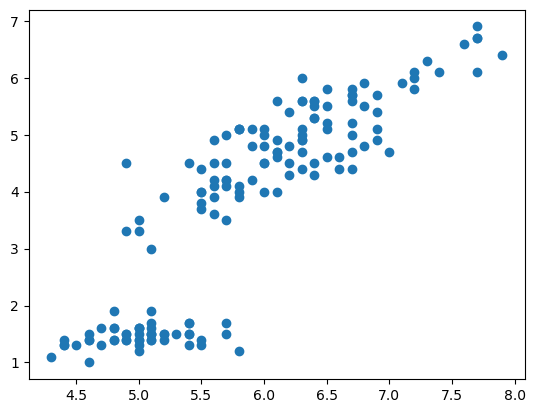

In [266]:
plt.scatter(dataset.data[: , 0] , dataset.data[: ,1])

In [267]:
d = {}
import numpy as np
a = np.zeros([int(len(dataset.target)/3),2])
b = np.zeros([int(len(dataset.target)/3),2])
c = np.zeros([int(len(dataset.target)/3),2])
count = 0
counta = 0
countb = 0
countc = 0
for x in dataset.target:
    if x == 0:
        # print(count)
        # print(dataset.data[count])
        a[counta] = dataset.data[count]
        counta +=1
        d[x] = a

    elif x == 1:
        # print(dataset.data[count])
        b[countb] = dataset.data[count]
        countb += 1
        d[x] = b
    else :
        # print(dataset.data[count])
        c[countc] = dataset.data[count]
        countc += 1
        d[x] = c
    count +=1

    
print(len(a))
# print(b)
# print(c)
# d

50


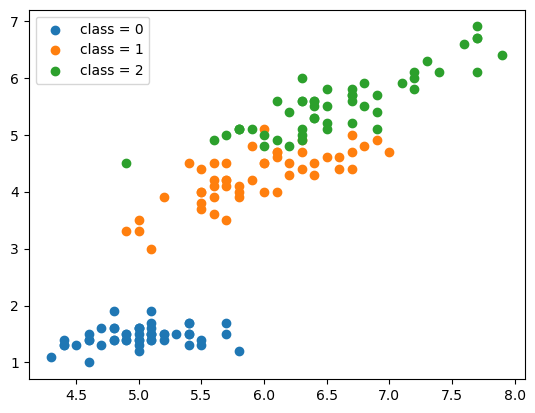

In [268]:
for x in d: 
    plt.scatter(d[x][: , 0] , d[x][:  , 1] , label = 'class = {0}'.format(x))
plt.legend()
plt.show()

In [269]:
X , y = dataset.data , dataset.target
print(X.shape)
print(X[ :2])

(150, 2)
[[5.1 1.4]
 [4.9 1.4]]


In [270]:
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size=0.4 , stratify=y , random_state=42)

In [271]:
# X_train

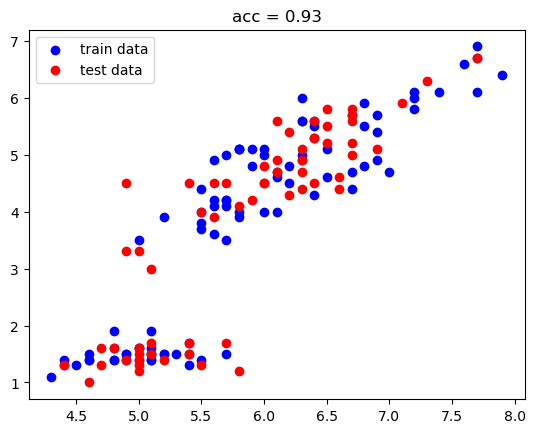

In [272]:
from sklearn.neighbors import KNeighborsClassifier as knc

n = 5
neigh = knc(n_neighbors= n).fit(X_train , y_train)
y_hat = neigh.predict(X_test)


from sklearn import metrics
acc = metrics.accuracy_score(y_test , y_hat)


plt.scatter(X_train[:, 0] , X_train[:, 1] , color = 'blue' , label = 'train data')
plt.scatter(X_test[: , 0] , X_test[: , 1] , color = 'red' , label = 'test data')

plt.title('acc = %.2f' % acc)
plt.legend()
plt.show()

## Another example for KNN

In [288]:
# Load Digits dataset
X, y = datasets.load_digits(return_X_y=True)

In [289]:
print(X.shape)
print(y.shape)
dim = len(X[0])

(1797, 64)
(1797,)


In [297]:
unique, counts = np.unique(y, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 178]
 [  1 182]
 [  2 177]
 [  3 183]
 [  4 181]
 [  5 182]
 [  6 181]
 [  7 179]
 [  8 174]
 [  9 180]]


In [298]:
random_state = 0

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=random_state
)

In [299]:
n_neighbors = 3
knn = knc(n_neighbors=n_neighbors)


In [300]:
knn.fit(X_train , y_train)
y_hat = knn.predict(X_test)
acc = metrics.accuracy_score(y_test , y_hat)

In [301]:
acc

0.9866518353726362

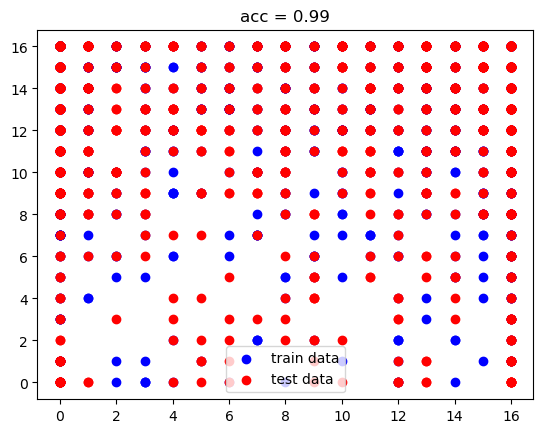

In [305]:
plt.scatter(X_train[:, 43] , X_train[:, 3] , color = 'blue' , label = 'train data')
plt.scatter(X_test[: , 43] , X_test[: , 3] , color = 'red' , label = 'test data')

plt.title('acc = %.2f' % acc)
plt.legend(loc = 'best')
plt.show()


In [307]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


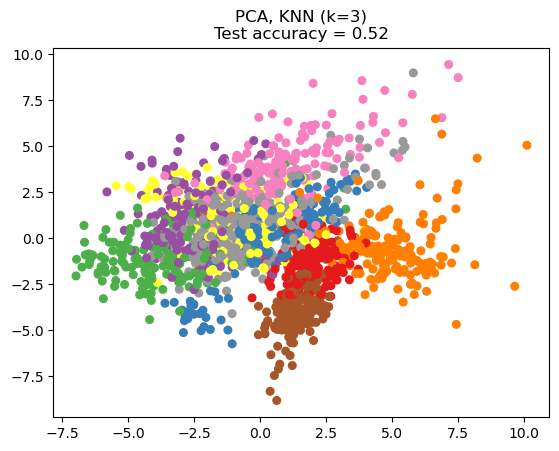

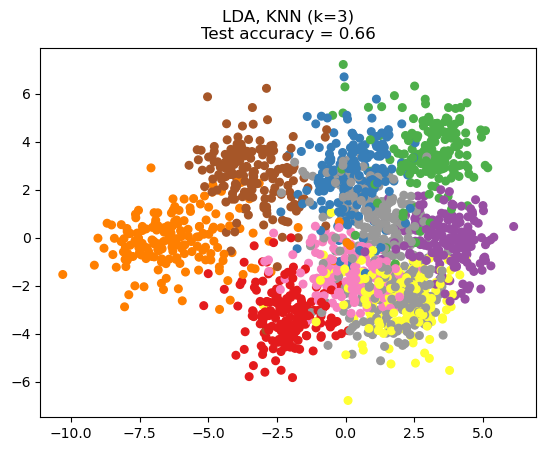

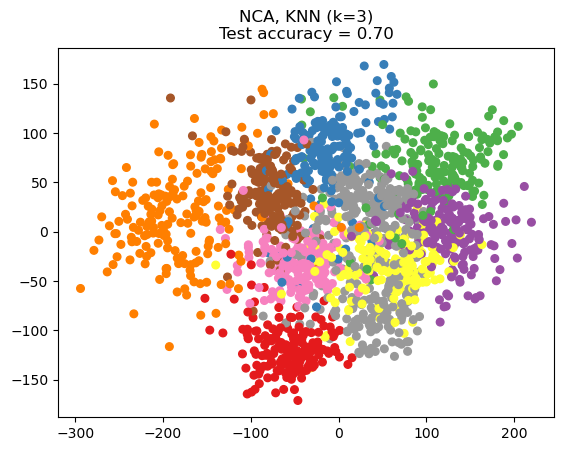

In [313]:
dim = len(X[0])
n_classes = len(np.unique(y))

# Reduce dimension to 2 with PCA
pca = make_pipeline(StandardScaler(), PCA(n_components=2, random_state=random_state))

# Reduce dimension to 2 with LinearDiscriminantAnalysis
lda = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis(n_components=2))

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(
    StandardScaler(),
    NeighborhoodComponentsAnalysis(n_components=2, random_state=random_state),
)

# Use a nearest neighbor classifier to evaluate the methods
knn = KNeighborsClassifier(n_neighbors=n_neighbors)

# Make a list of the methods to be compared
dim_reduction_methods = [("PCA", pca), ("LDA", lda), ("NCA", nca)]

# plt.figure()
for i, (name, model) in enumerate(dim_reduction_methods):
    plt.figure()
    # plt.subplot(1, 3, i + 1, aspect=1)

    # Fit the method's model
    model.fit(X_train, y_train)

    # Fit a nearest neighbor classifier on the embedded training set
    knn.fit(model.transform(X_train), y_train)

    # Compute the nearest neighbor accuracy on the embedded test set
    acc_knn = knn.score(model.transform(X_test), y_test)

    # Embed the data set in 2 dimensions using the fitted model
    X_embedded = model.transform(X)

    # Plot the projected points and show the evaluation score
    plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y, s=30, cmap="Set1")
    
    # plt.legend()
    plt.title(
        "{}, KNN (k={})\nTest accuracy = {:.2f}".format(name, n_neighbors, acc_knn)
    )
plt.show()